In [16]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
faces,targets = fetch_olivetti_faces(return_X_y=True)

In [18]:
trainx,testx,trainy,testy=train_test_split(faces,targets,stratify=targets,test_size=0.5)

In [90]:
validx,testx,validy,testy=train_test_split(testx,testy,stratify=testy,test_size=0.5)

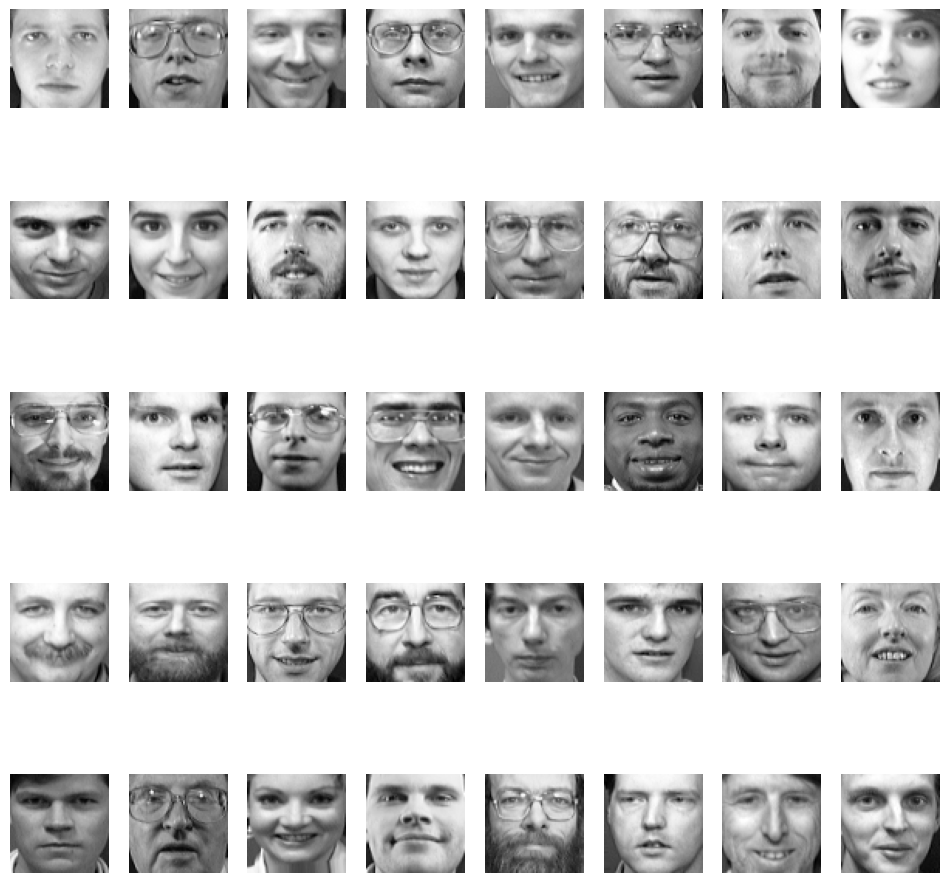

In [25]:
k=1
plt.figure(figsize=(12,12))
for i in range(0,400,10):
    plt.subplot(5,8,k)
    plt.axis(False)
    plt.imshow(faces[i].reshape(64,64),cmap="gray")
    k+=1

In [150]:
from sklearn.metrics import silhouette_score,silhouette_samples
k=150
kmeans_per_k=[KMeans(n_clusters=i).fit(trainx) for i in range(1,k+1)]
inertia_per_k= [kmeans_per_k[i].inertia_ for i in range(k)]
min_inertia= np.min(inertia_per_k)
min_inertia_k= np.argmin(inertia_per_k)
silhouette_scores = [silhouette_score(trainx,kmeans.labels_) for kmeans in kmeans_per_k[1:]]
max_silhouette_score= np.max(silhouette_scores)
max_silhouette_score_k= np.argmax(silhouette_scores)


Text(0, 0.5, 'Silhouette_scores')

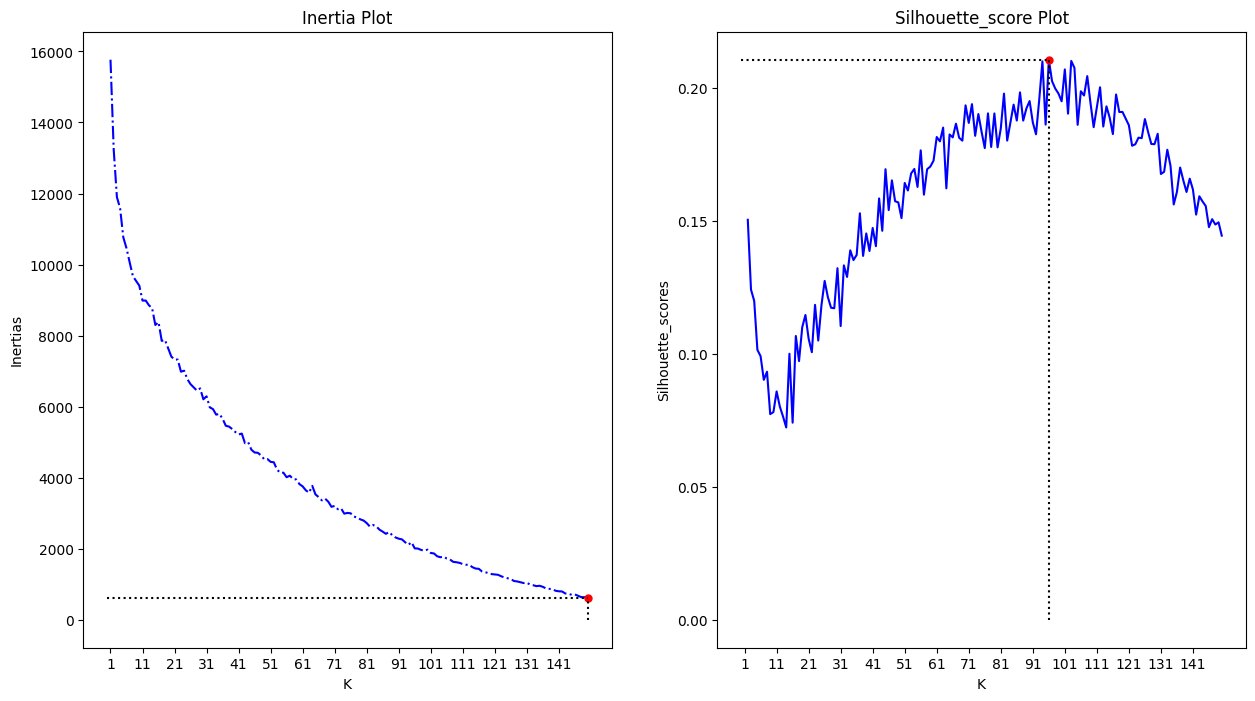

In [151]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xticks(range(1,k+1,10))
plt.plot(range(1,k+1),inertia_per_k,"-.",color="blue")
plt.plot(min_inertia_k+1,min_inertia,"ro",markersize=5)
plt.plot([0,min_inertia_k+1],[min_inertia,min_inertia],"k:")
plt.plot([min_inertia_k+1,min_inertia_k+1],[0,min_inertia],"k:")
plt.title("Inertia Plot")
plt.xlabel("K")
plt.ylabel("Inertias")


plt.subplot(1,2,2)
plt.xticks(range(1,k+1,10))
plt.plot(range(2,k+1),silhouette_scores,color="blue")
plt.plot(max_silhouette_score_k+2,max_silhouette_score,"ro",markersize=5)
plt.plot([0,max_silhouette_score_k+2],[max_silhouette_score,max_silhouette_score],"k:")
plt.plot([max_silhouette_score_k+2,max_silhouette_score_k+2],[0,max_silhouette_score],"k:")
plt.title("Silhouette_score Plot")
plt.xlabel("K")
plt.ylabel("Silhouette_scores")


According to silhouttee score the best number of clusters is 96. i.e 94+2

In [163]:
best_model = kmeans_per_k[max_silhouette_score_k+1]

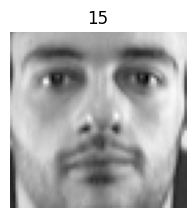

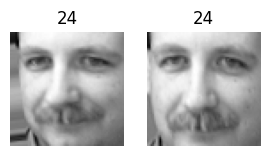

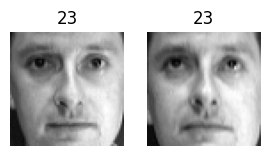

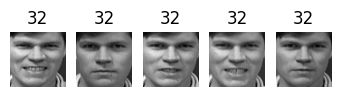

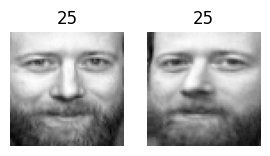

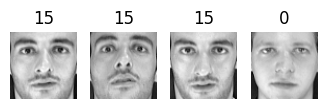

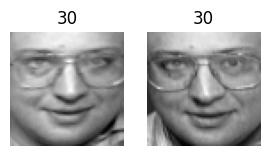

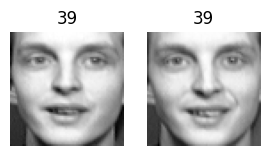

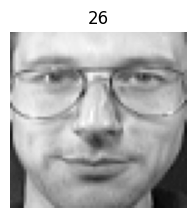

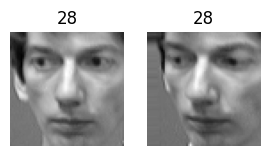

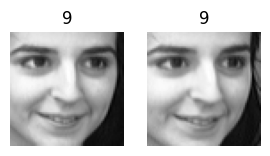

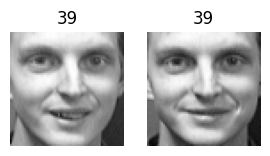

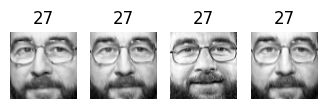

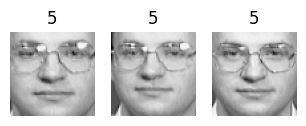

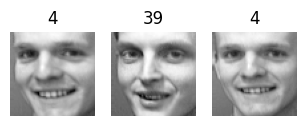

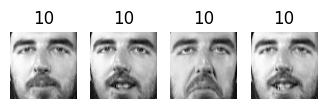

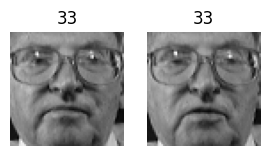

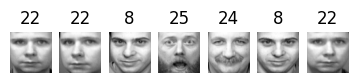

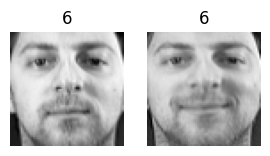

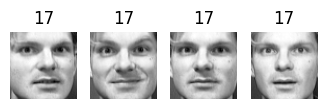

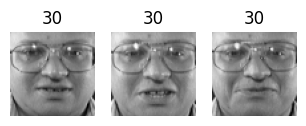

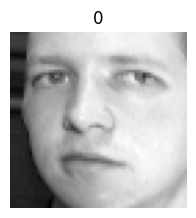

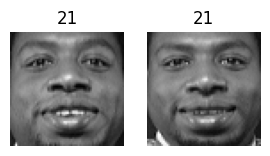

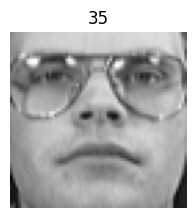

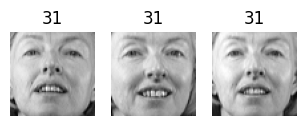

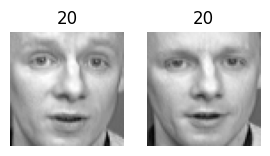

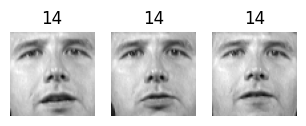

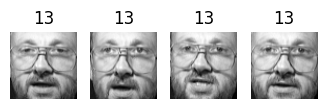

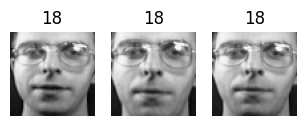

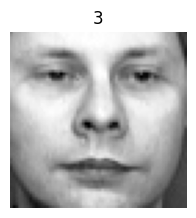

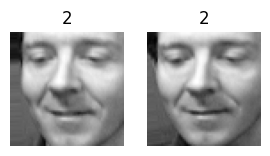

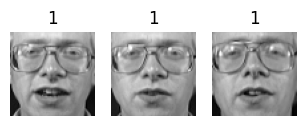

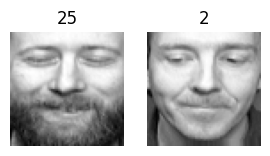

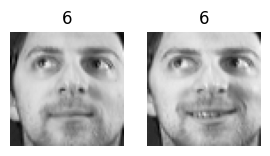

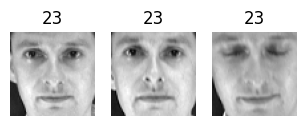

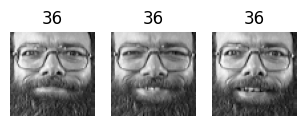

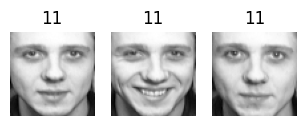

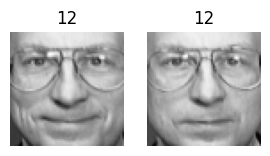

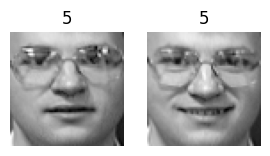

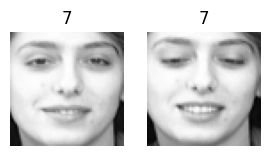

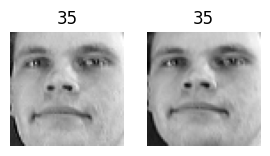

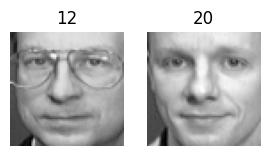

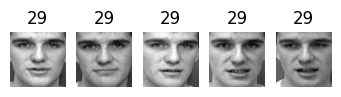

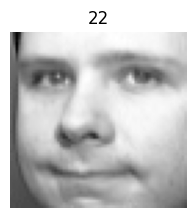

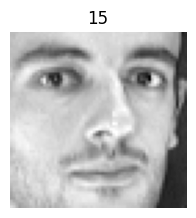

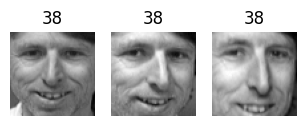

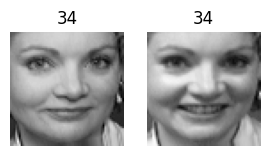

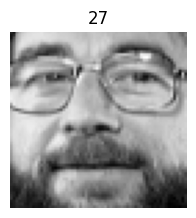

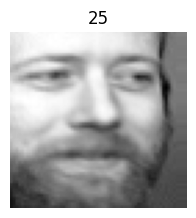

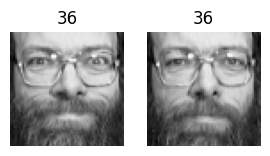

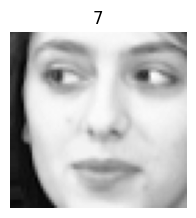

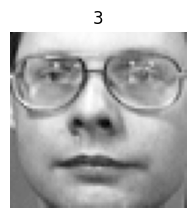

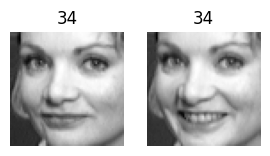

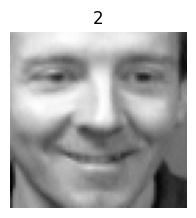

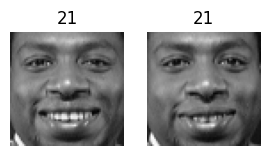

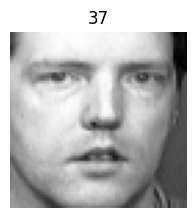

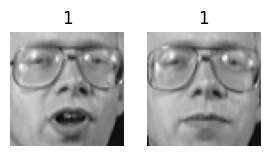

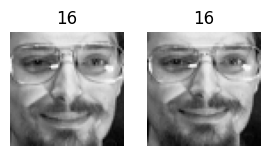

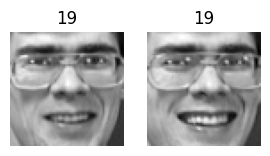

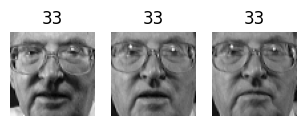

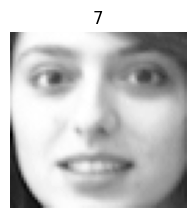

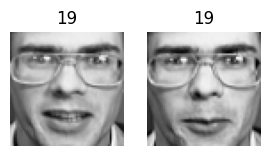

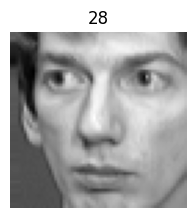

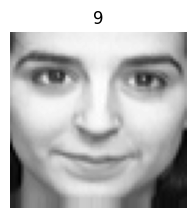

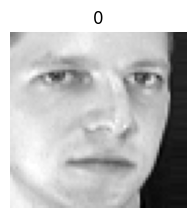

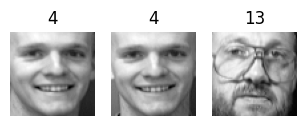

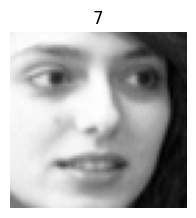

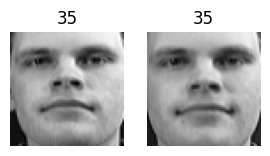

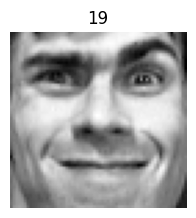

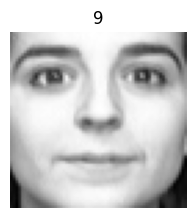

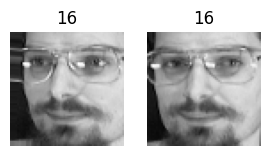

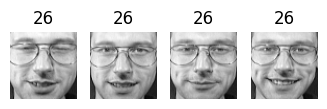

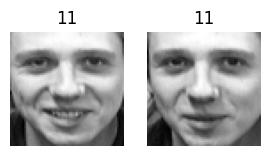

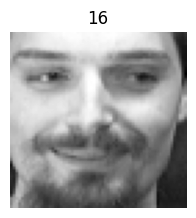

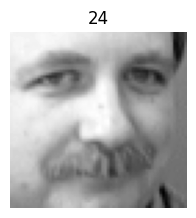

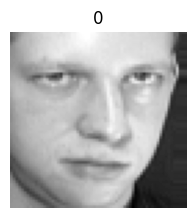

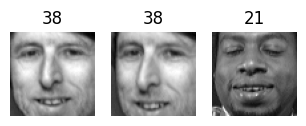

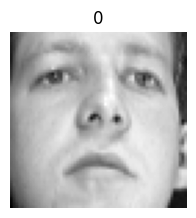

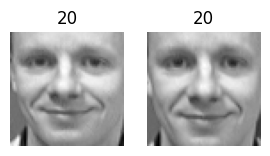

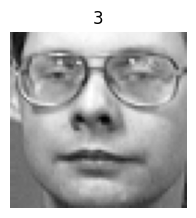

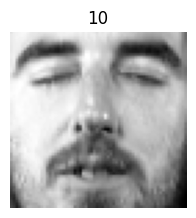

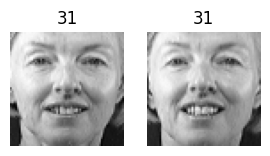

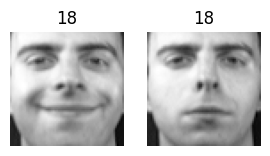

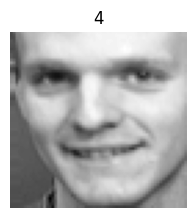

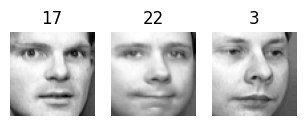

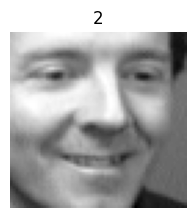

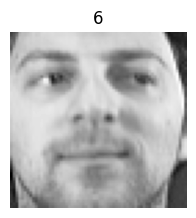

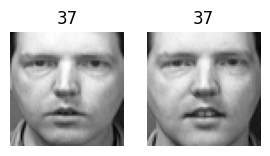

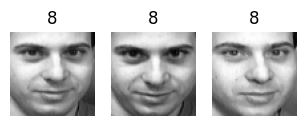

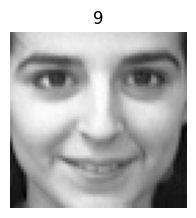

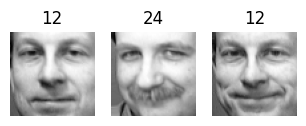

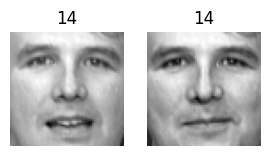

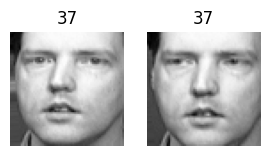

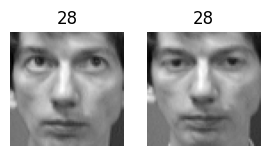

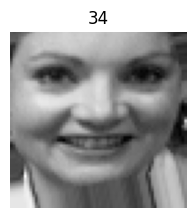

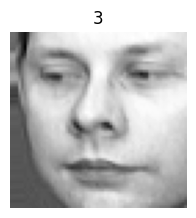

In [175]:
for i in range(96):
    inclusters = best_model.labels_==i
    faces=trainx[inclusters]
    targets=trainy[inclusters]
    plot_index=1
    plt.figure(figsize=(5,5))
    for i in range(len(faces)):
        plt.subplot(1,len(faces)+1,plot_index)
        plt.axis(False)
        plt.imshow(faces[i].reshape(64,64),cmap="gray")
        plt.title(targets[i])
        plot_index+=1
    plt.show()


In [168]:
inclusters

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,